In [1]:
! curl "https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_testing-set.csv" -o "data.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.7M  100 30.7M    0     0  7222k      0  0:00:04  0:00:04 --:--:-- 7752k


In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('data.csv', low_memory=False)

In [84]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [85]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [86]:
df = df.drop(columns=['id', 'dur', 'service', 'state', 'rate', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'], axis=1)

In [87]:
df.shape

(175341, 10)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   proto   175341 non-null  object 
 1   spkts   175341 non-null  int64  
 2   dpkts   175341 non-null  int64  
 3   sbytes  175341 non-null  int64  
 4   dbytes  175341 non-null  int64  
 5   sttl    175341 non-null  int64  
 6   dttl    175341 non-null  int64  
 7   sload   175341 non-null  float64
 8   dload   175341 non-null  float64
 9   label   175341 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.4+ MB


In [89]:
df.describe()

,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,label
count,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000
mean,20.298664,18.969591,8.844844e+03,1.492892e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,0.680622
std,136.887597,110.258271,1.747656e+05,1.436542e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,0.466237
min,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000
50%,2.000000,2.000000,4.300000e+02,1.640000e+02,254.000000,29.000000,8.796748e+05,1.447023e+03,1.000000
75%,12.000000,10.000000,1.418000e+03,1.102000e+03,254.000000,252.000000,8.888889e+07,2.784487e+04,1.000000
max,9616.000000,10974.000000,1.296523e+07,1.465555e+07,255.000000,254.000000,5.988000e+09,2.242273e+07,1.000000


In [90]:
df.isnull()

,proto,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
175336,False,False,False,False,False,False,False,False,False,False
175337,False,False,False,False,False,False,False,False,False,False
175338,False,False,False,False,False,False,False,False,False,False
175339,False,False,False,False,False,False,False,False,False,False


In [91]:
df.isnull().sum()

proto     0
spkts     0
dpkts     0
sbytes    0
dbytes    0
sttl      0
dttl      0
sload     0
dload     0
label     0
dtype: int64

In [92]:
df['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [93]:
print(df['proto'].value_counts())

tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
rdp          98
netblt       98
igmp         18
icmp         15
rtp           1
Name: proto, Length: 133, dtype: int64


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df['proto'])

label

array([113, 113, 113, ..., 119, 119, 119])

In [95]:
df['proto'] = label

In [96]:
print(df['proto'].value_counts())

113    79946
119    63283
120    12084
6       2859
78      2595
       ...  
89        98
75        98
42        18
37        15
91         1
Name: proto, Length: 133, dtype: int64


In [97]:
df = df.sample(frac=1)

In [98]:
df.head()

,proto,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,label
92313,120,2,0,200,0,254,0,8.888889e+07,0.000000e+00,1
160852,113,52,318,2256,409228,62,252,6.560493e+03,1.209354e+06,1
147185,119,2,0,114,0,254,0,1.520000e+08,0.000000e+00,1
74798,113,10,6,534,268,254,252,9.612959e+03,4.476721e+03,1
52610,113,10,8,786,956,62,252,3.985830e+03,4.712062e+03,1


In [99]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [100]:
print(X.shape)
print(Y.shape)

(175341, 9)
(175341,)


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99)

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='gini',
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)

In [103]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [104]:
clf.feature_importances_

array([0.01993104, 0.02168686, 0.0292624 , 0.06793639, 0.05808545,
       0.42762394, 0.10384362, 0.10299894, 0.16863135])

In [105]:
Y_pred = clf.predict(X_test)

In [106]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[11155,  2886],
       [   47, 29748]])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9330915229491742

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, Y_train, cv=10)

array([0.93741921, 0.93741921, 0.93399741, 0.93437761, 0.93490989,
       0.93505703, 0.93596958, 0.93543726, 0.93247148, 0.93847909])

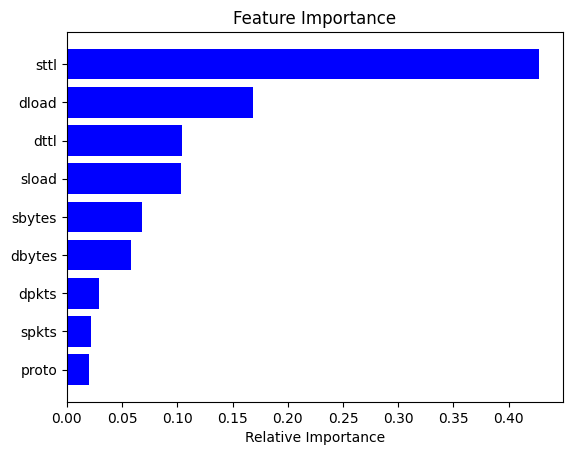

In [110]:
features = df.columns
importance = clf.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [111]:
import os
import joblib

In [112]:
joblib.dump(clf, 'random_forest.joblib')

['random_forest.joblib']

In [113]:
load_rf = joblib.load('random_forest.joblib')
accuracy_score(Y_test, load_rf.predict(X_test))

0.9330915229491742